In [1]:
!pip install audiofile opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 7.4 MB/s eta 0:00:00
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168840 sha256=fdedb7a75eb11f45c6b3e70c3ff81363fc2ae0648607eac710a268b730320677
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [2]:
import os
os.chdir('/kaggle/input/cremad/')

In [3]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Audio

# Reading code from https://www.kaggle.com/code/kennethfilbert/speech-recognition-emotion-bi-gru-crema-d
# Reading of the paths and files

PATH = "/kaggle/input/cremad/AudioWAV/"

directory_list = os.listdir(PATH)

file_emotion = []
file_path = []
speakers = []

for file in directory_list:
    file_path.append(PATH + file)
    part = file.split('_')
    speakers.append(int(part[0]))
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

crema_df = pd.DataFrame(list(zip(speakers, file_emotion, file_path)),
               columns =['ActorID', 'emotion','path'])
crema_df.head()



,ActorID,emotion,path
0,1028,disgust,/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav
1,1075,happy,/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav
2,1084,happy,/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav
3,1067,disgust,/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav
4,1066,disgust,/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav


In [4]:
os.chdir('/kaggle/input/cusser-data/')

In [5]:
#Leftside merge of dataframe to have demographic data available. 
demographics = pd.read_csv("data/VideoDemographics.csv")
crema_df = pd.merge(crema_df, demographics, how="left", on=["ActorID", "ActorID"])
print(crema_df.head())


   ActorID  emotion                                               path  Age  \
0     1028  disgust  /kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav   57   
1     1075    happy  /kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav   40   
2     1084    happy  /kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav   46   
3     1067  disgust  /kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav   66   
4     1066  disgust  /kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav   25   

      Sex       Race     Ethnicity  
0  Female  Caucasian  Not Hispanic  
1  Female  Caucasian  Not Hispanic  
2  Female  Caucasian  Not Hispanic  
3    Male  Caucasian  Not Hispanic  
4    Male  Caucasian  Not Hispanic  


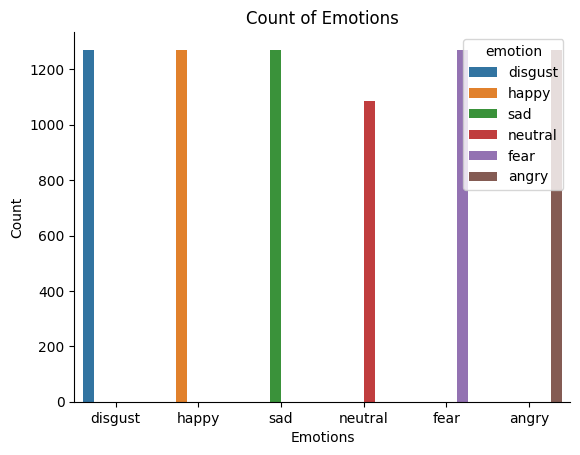

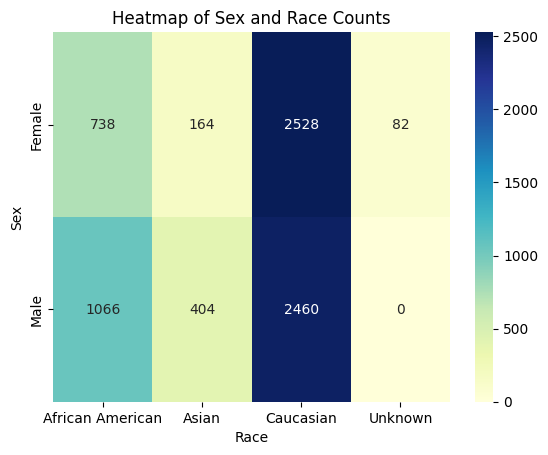

In [6]:
#Show some data-distributions

plt.title('Count of Emotions')
sns.countplot(x = crema_df["emotion"], hue = crema_df["emotion"])
plt.ylabel('Count')
plt.xlabel('Emotions')
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()


# Create pivot table
pivot_table = pd.crosstab(crema_df['Sex'], crema_df['Race'])
pivot_table = pivot_table.round(0).astype(int)
# Generate heatmap

sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", cbar=True)
plt.title('Heatmap of Sex and Race Counts')
plt.xlabel('Race')
plt.ylabel('Sex')
plt.show()



In [7]:
#Function definitions for wave plots and spectrograms


def waveplot(data, sr, e):
    plt.figure(figsize = (10, 3))
    plt.title(f"{e} audio waveplot")
    librosa.display.waveshow(data, sr = sr)

def spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize = (12, 3))
    plt.title(f"{e} audio spectrogram")
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')



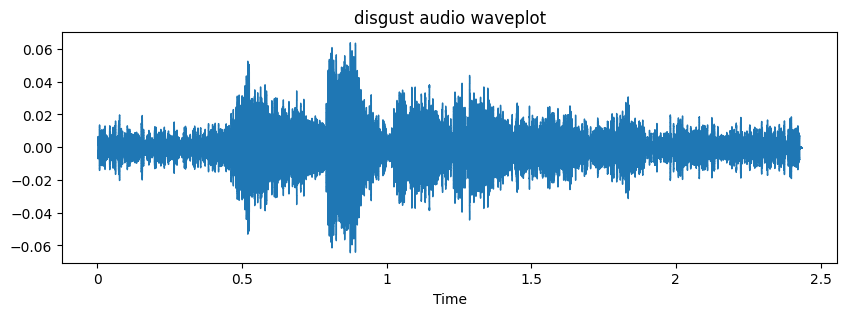

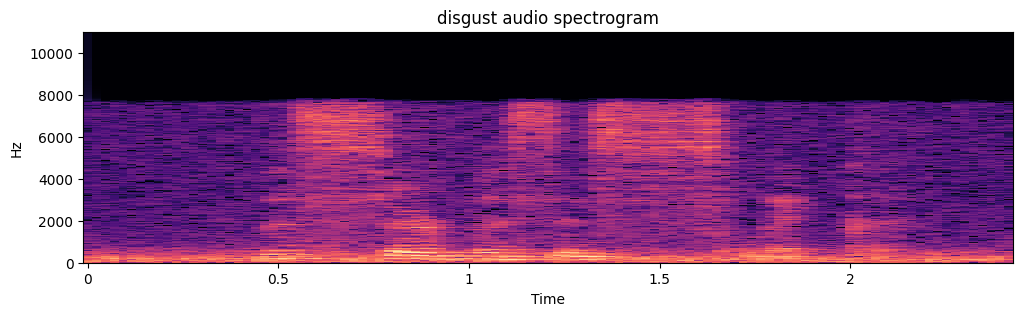

In [8]:
#Sample Display

import numpy as np
path = crema_df.iloc[0]["path"]
emotion = crema_df.iloc[0]["emotion"]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate,emotion)
spectrogram(data, sampling_rate,emotion)
Audio(path)


In [9]:
#Sample Opensmile feauture extraction
import audiofile
import opensmile


class openSmileExtractor():
    def __init__(self,featureLevel = opensmile.FeatureLevel.Functionals):
        self.smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.eGeMAPSv02,
        feature_level=featureLevel,
    )
    
    def processSignal(self,path):
        signal, sampling_rate = audiofile.read(
            path,
            always_2d=True,
        )
        process = self.smile.process_signal(
            signal,
            sampling_rate
        )
        return process
    
    def processSignals(self,paths):
        process = self.smile.process_files(
            paths,
        )
        return process
    
    def processDF(self, df, filename="opensmileDF.csv"):
        paths = list(df["path"])
        feature_df=self.processSignals(paths)
        final_df = pd.merge(df, feature_df, how="left", left_on=["path"],right_on=["file"])
        feature_df.to_csv('/kaggle/working/' + filename)
        return feature_df

extractor = openSmileExtractor(featureLevel = opensmile.FeatureLevel.Functionals)
res = extractor.processDF(crema_df,filename="opensmileDF_functional.csv")
res

,,,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
file,start,end,,,,,,,,,,,,,,,,,,,,,
/kaggle/input/cremad/AudioWAV/1028_TSI_DIS_XX.wav,0 days,0 days 00:00:02.435750,31.843594,0.066027,29.824358,31.224945,34.570621,4.746264,11.215782,0.000000,19.599173,0.000000,...,-0.011965,-0.005773,0.060625,3.305785,1.687764,0.070000,0.031623,0.400000,0.338999,-39.858093
/kaggle/input/cremad/AudioWAV/1075_IEO_HAP_LO.wav,0 days,0 days 00:00:01.634937500,37.470352,0.018325,36.790627,37.367832,37.973610,1.182983,7.533396,5.399044,8.758223,0.000000,...,-0.015680,-0.005265,0.056746,1.851852,1.273885,0.205000,0.105000,0.370000,0.345350,-36.693794
/kaggle/input/cremad/AudioWAV/1084_ITS_HAP_XX.wav,0 days,0 days 00:00:02.602625,34.174248,0.200336,27.200321,36.245327,40.495525,13.295204,60.377769,40.164200,19.196775,0.000000,...,-0.010466,-0.000292,0.052593,2.702703,2.777778,0.147143,0.097499,0.190000,0.138048,-32.154503
/kaggle/input/cremad/AudioWAV/1067_IWW_DIS_XX.wav,0 days,0 days 00:00:02.535875,32.834442,0.064004,32.632774,33.609734,33.910126,1.277351,8.628837,5.403220,32.881710,23.278381,...,0.000119,-0.009572,0.107430,1.984127,0.809717,0.240000,0.200000,0.646667,0.516161,-27.844328
/kaggle/input/cremad/AudioWAV/1066_TIE_DIS_XX.wav,0 days,0 days 00:00:02.669312500,25.211651,0.054157,23.616608,25.718061,26.571951,2.955343,13.419339,9.666656,16.029697,6.598593,...,-0.009107,-0.005798,0.069749,1.886793,2.307692,0.123333,0.046428,0.247143,0.268685,-33.363216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/kaggle/input/cremad/AudioWAV/1060_IEO_ANG_MD.wav,0 days,0 days 00:00:02.035375,33.853783,0.098916,32.483665,35.657272,35.922607,3.438942,159.588638,140.600967,24.949764,41.559708,...,-0.008173,0.001322,0.088716,2.970297,2.030457,0.150000,0.145945,0.256000,0.277748,-29.984852
/kaggle/input/cremad/AudioWAV/1088_IWL_ANG_XX.wav,0 days,0 days 00:00:02.402375,28.860296,0.147973,24.754416,29.043905,33.069210,8.314795,7.965240,19.983400,22.988697,0.000000,...,-0.005517,-0.004445,0.139384,2.510460,1.709402,0.182500,0.170935,0.377500,0.383561,-20.728254
/kaggle/input/cremad/AudioWAV/1050_IOM_ANG_XX.wav,0 days,0 days 00:00:02.969625,29.471830,0.115801,26.096754,28.761652,32.864025,6.767271,36.964405,13.201714,11.890188,15.727478,...,-0.007080,-0.007950,0.121604,2.711864,1.724138,0.292000,0.164122,0.221667,0.193599,-22.773071
